<a href="https://colab.research.google.com/github/DiKachura/machine_learning/blob/main/%D0%B2%D0%B0%D1%85_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

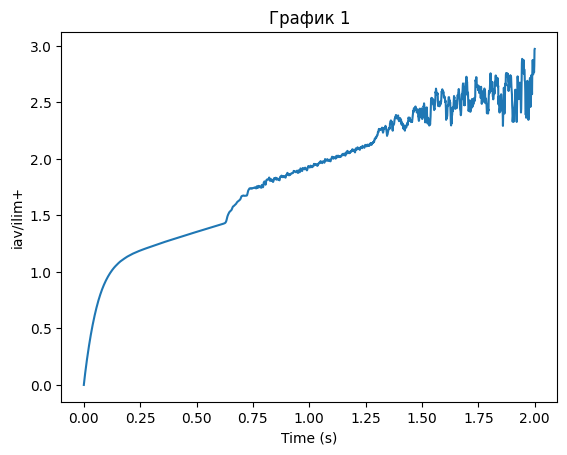

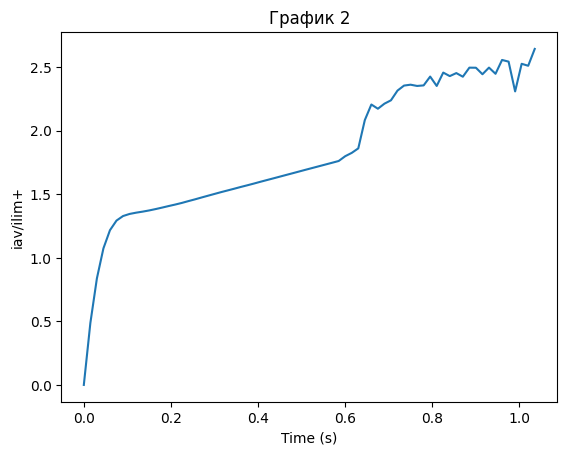

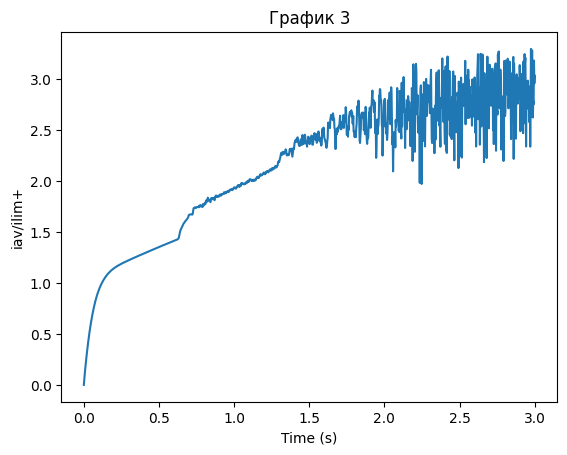

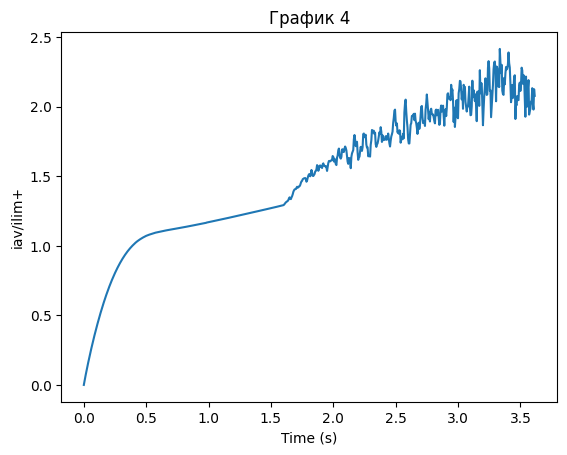

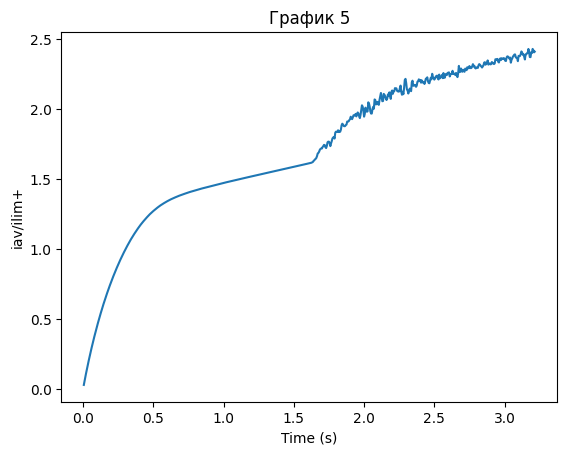

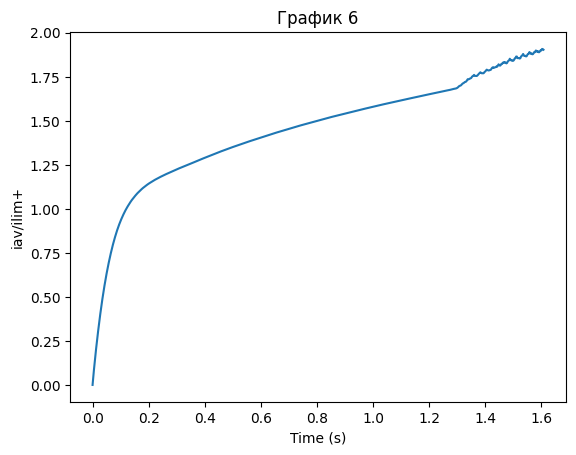

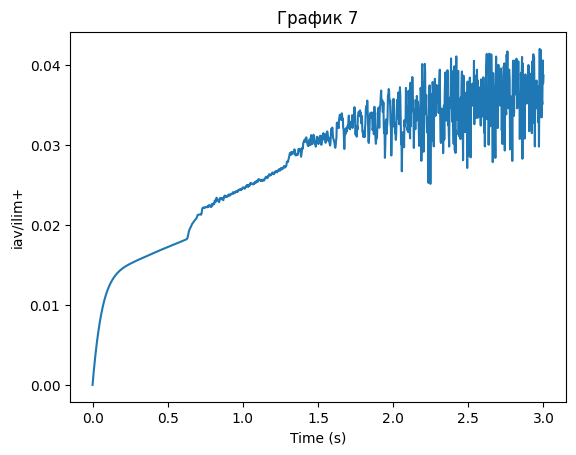

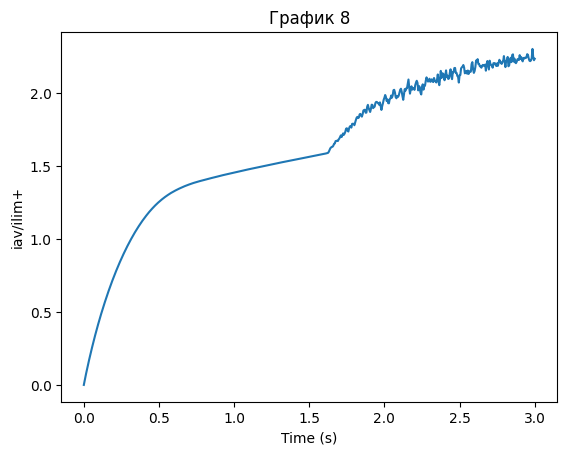

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.layers import Activation, Input, MaxPooling1D, Dropout
from tensorflow.keras.layers import AveragePooling1D, Conv1D, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from tensorflow.keras.utils import plot_model
from IPython.display import display, Image

# Загрузка данных из CSV-файла
data = pd.read_csv('/content/диплом (2).csv')

# Группировка данных по номерам графиков
grouped_data = data.groupby('version')

# Построение графиков для каждого графика
for group_name, group_data in grouped_data:
    x = group_data['Time (s)']*0.005
    y = group_data['iav/ilim+']

    # Создание нового графика
    plt.figure()

    # Построение графика
    plt.plot(x, y)

    # Настройка заголовка и осей
    plt.title('График {}'.format(group_name))
    plt.xlabel('Time (s)')
    plt.ylabel('iav/ilim+')

    # Отображение графика
    plt.show()

In [284]:
import pandas as pd

# Загрузка данных из файла
data = pd.read_csv("/content/диплом (1).csv")

# Просмотр первых нескольких строк данных
data.head()

,Time (s),iav/ilim+,version,H,L,V0,C0,D1,D2,z1,...,j3a,j4k,D1_1,spacers_col,spacers_position,spacers_rad,sapcers_square,x,y,spacers_type
0,0.0,0.000000,1,0.0005,0.004,0.0001,0.01,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,no,0.00,0.0,no,no,no
1,0.2,0.018764,1,0.0005,0.004,0.0001,0.01,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,no,0.00,0.0,no,no,no
2,0.4,0.036717,1,0.0005,0.004,0.0001,0.01,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,no,0.00,0.0,no,no,no
3,0.6,0.054130,1,0.0005,0.004,0.0001,0.01,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,no,0.00,0.0,no,no,no
4,0.8,0.071109,1,0.0005,0.004,0.0001,0.01,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,no,0.00,0.0,no,no,no


In [317]:
import pandas as pd

# Загрузка данных из файла
data = pd.read_csv("/content/диплом (1).csv")

# Выбор одного ряда данных
selected_row = data['iav/ilim+']  # Замените 'Column_Name' на имя нужного вам столбца

# Нарезка выбранного ряда скользящим окном размером 20
window_size = 20
sliced_data = selected_row.rolling(window=window_size).mean().dropna()

# Просмотр первых нескольких нарезанных значений
print(sliced_data.head())

19    0.155028
20    0.170450
21    0.185590
22    0.200478
23    0.215136
Name: iav/ilim+, dtype: float64


Epoch 1/1000
3521/3521 [==============================] - 9s 2ms/step - loss: 0.2715
Epoch 2/1000
3521/3521 [==============================] - 8s 2ms/step - loss: 0.1569
Epoch 3/1000
3521/3521 [==============================] - 7s 2ms/step - loss: 0.1305
Epoch 4/1000
3521/3521 [==============================] - 8s 2ms/step - loss: 0.1136
Epoch 5/1000
3521/3521 [==============================] - 8s 2ms/step - loss: 0.1034
Epoch 6/1000
3521/3521 [==============================] - 7s 2ms/step - loss: 0.0959
Epoch 7/1000
3521/3521 [==============================] - 8s 2ms/step - loss: 0.0920
Epoch 8/1000
3521/3521 [==============================] - 8s 2ms/step - loss: 0.0888
Epoch 9/1000
3521/3521 [==============================] - 8s 2ms/step - loss: 0.0857
Epoch 10/1000
3521/3521 [==============================] - 8s 2ms/step - loss: 0.0823
Epoch 11/1000
3521/3521 [==============================] - 7s 2ms/step - loss: 0.0813
Epoch 12/1000
3521/3521 [==============================] - 9s 3

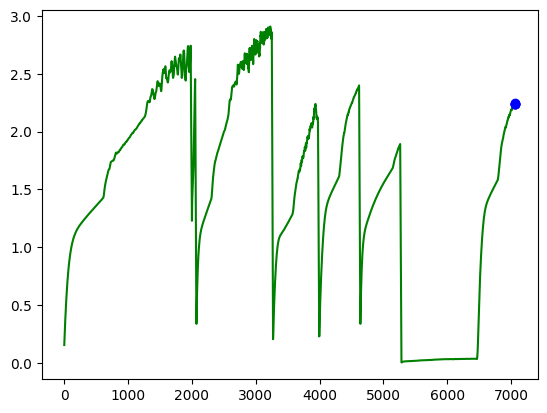

In [321]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Загрузка данных из файла
data = pd.read_csv("/content/диплом (1).csv")

# Выбор одного ряда данных
selected_row = data['iav/ilim+']  # Замените 'Column_Name' на имя нужного вам столбца

# Нарезка выбранного ряда скользящим окном размером 20
window_size = 20
sliced_data = selected_row.rolling(window=window_size).mean().dropna()

# Преобразование данных в массивы numpy
data_array = np.array(sliced_data)
data_x_list = []
data_y_list = []

for i in range(len(data_array) - window_size - 5):
    vekt_x = np.reshape(data_array[i:i+window_size], (window_size, 1))
    data_x_list.append(vekt_x)
    data_y_list.append(data_array[i+window_size:i+window_size+5])

data_x_array = np.stack(data_x_list)
data_y_array = np.stack(data_y_list)

# Создание модели
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, padding="same", strides=1, input_shape=(window_size, 1)))
model.add(Conv1D(8, 5))
model.add(Dropout(0.3))
model.add(Conv1D(16, 5))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation=None))

# Компиляция модели
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=optimizer, loss='mae')

# Обучение модели
EPOCHS = 1000
model.fit(data_x_array, data_y_array, epochs=EPOCHS, batch_size=2)

# Предсказание значений
val_data = np.array(data_array[-window_size-5:-5])
val_data = np.reshape(val_data, (1, window_size, 1))
pred = model.predict(val_data)

# Визуализация результатов
plt.plot(data_array, 'g', np.arange(len(data_array)-5, len(data_array)), pred[0], 'bo')
plt.show()

1/1 [==============================] - 0s 33ms/step


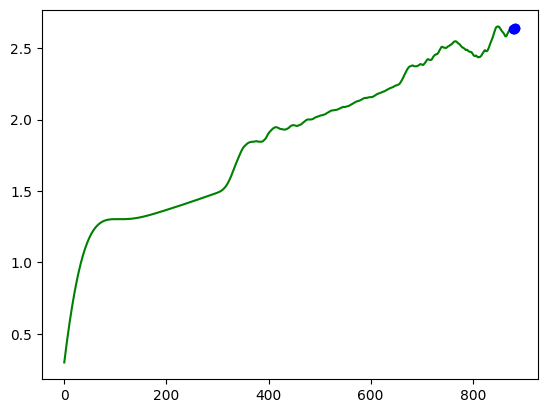

In [324]:
# Загрузка данных из файла
data = pd.read_excel("/content/полная_тестовая_выборка.xlsx")

# Выбор одного ряда данных
selected_row = data['iav/ilim+']  # Замените 'Column_Name' на имя нужного вам столбца

# Нарезка выбранного ряда скользящим окном размером 20
window_size = 20
sliced_data = selected_row.rolling(window=window_size).mean().dropna()

# Преобразование данных в массивы numpy
data_array = np.array(sliced_data)

# Предсказание значений
val_data = np.array(data_array[-window_size:])
val_data = np.reshape(val_data, (1, window_size, 1))
pred = model.predict(val_data)

# Визуализация результатов
plt.plot(data_array, 'g', np.arange(len(data_array), len(data_array)+5), pred[0], 'bo')
plt.show()